# Import Libraries and read data

In [3]:
# Import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read data
loan_data = pd.read_csv('loan_data.csv')

# Play around with data for visualization and analysis purposes

In [4]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan_data.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.0

# Check number of people with credit policy and paid stats and compare with fico scores

Text(0.5, 0, 'Fico Score')

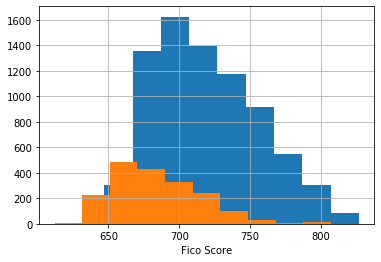

In [6]:
loan_data[loan_data['credit.policy']==1]['fico'].hist()
loan_data[loan_data['credit.policy']==0]['fico'].hist()
plt.xlabel('Fico Score')

Text(0.5, 0, 'Fico Score')

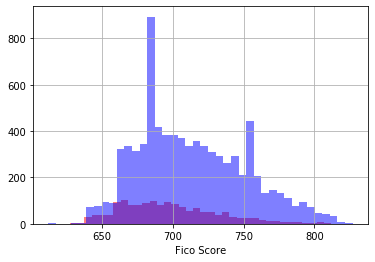

In [7]:
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(alpha = 0.5, bins = 40, color ='red')
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(alpha = 0.5, bins = 40, color = 'blue')
plt.xlabel('Fico Score')

# Check trend difference between not fully paid and credit policy

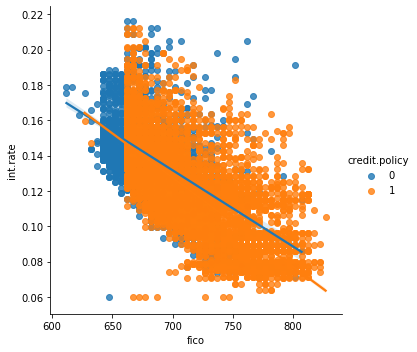

In [8]:
sns.lmplot(y='int.rate', x='fico', data = loan_data, hue = 'credit.policy')

# Apply dummy variables to categorical features

In [9]:
loan_data['purpose']
categorical = ['purpose']

In [10]:
loan_data_cat = pd.get_dummies(loan_data, columns=categorical, drop_first=True)

In [11]:
loan_data_cat.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Create Random Forest Model

In [12]:
from sklearn.model_selection import train_test_split
X = loan_data_cat.drop('not.fully.paid',axis=1)
y = loan_data_cat['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
random_forest = RandomForestClassifier(n_estimators=400)

In [16]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Evaluation of Random Forest Model

In [17]:
pred = random_forest.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2666
           1       0.31      0.02      0.04       495

    accuracy                           0.84      3161
   macro avg       0.58      0.51      0.48      3161
weighted avg       0.76      0.84      0.78      3161

